<a href="https://colab.research.google.com/github/RajBhadani/Project-Data_Science_and_Analytics/blob/main/Customer_Segmentation_Using_K_Means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Understand The Problem Statement**
To cluster customers into groups using unsupervised learning, specifically K-Means clustering, based on behavioral data (age, income, frequency, spending). The goal is to identify 3-5 meaningful customer types for targeted marketing.


**Loading the Dataset**


In [ ]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load the dataset
df = pd.read_csv("Customer_data.csv")
df.head()

,CustomerID,Age,Annual Income (USD),Monthly Purchase Frequency,Annual Spending (USD)
0,1,56,25903,9,15
1,2,69,53051,14,31
2,3,46,38654,9,28
3,4,32,28666,12,22
4,5,60,40301,11,45


# **Data Preprocessing**

In [ ]:
#Exploring Data Analysis
#Check if the data has missing value(s)
df.isnull().sum()

,0
CustomerID,0
Age,0
Annual Income (USD),0
Monthly Purchase Frequency,0
Annual Spending (USD),0


In [ ]:
#Get a basic statistical summary of the data
df.describe()

,CustomerID,Age,Annual Income (USD),Monthly Purchase Frequency,Annual Spending (USD)
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,500.500000,43.81900,50863.121000,9.970000,41.645000
std,288.819436,14.99103,14823.257362,3.181701,23.093122
min,1.000000,18.00000,6556.000000,2.000000,2.000000
25%,250.750000,31.00000,40822.250000,8.000000,25.000000
50%,500.500000,44.00000,50807.000000,10.000000,36.000000
75%,750.250000,56.00000,60281.750000,12.000000,54.000000
max,1000.000000,69.00000,89485.000000,21.000000,167.000000


In [ ]:
#We have a feature 'CustomerId' which is unique to each customer and is of no use in analysis and model building
#Let's go ahead and drop the feature
df = df.drop('CustomerID', axis=1)
df

,Age,Annual Income (USD),Monthly Purchase Frequency,Annual Spending (USD)
0,56,25903,9,15
1,69,53051,14,31
2,46,38654,9,28
3,32,28666,12,22
4,60,40301,11,45
...,...,...,...,...
995,60,56292,11,71
996,64,36687,12,39
997,62,43438,10,40
998,35,60835,8,41


**Scaling**

In [ ]:
#Scaling
#Since the clustering algos use distance as a metric to create categories, we need to scale the data

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)
df_scaled

array([[ 0.81295917, -1.68469115, -0.30502089, -1.1543841 ],
       [ 1.68057836,  0.14767157,  1.26725174, -0.46119042],
       [ 0.1455598 , -0.82405843, -0.30502089, -0.59116424],
       ...,
       [ 1.2133988 , -0.50116086,  0.00943364, -0.07126898],
       [-0.5885795 ,  0.67305508, -0.61947542, -0.02794437],
       [ 0.74621924, -0.4357579 ,  0.32388816, -0.85111187]])

# **Creating Model Using K-Means**

In [ ]:
#K-Means
from sklearn.cluster import KMeans

In [ ]:
#To see what k value is good for the data, we will use the 'elbow method' by plotting a graph b/w sum of squared distances and k value
#Note: model.inertia_: Sum of squared distances of samples of their closest cluster center, weighted by the sample weighs if provided

ssd = [] # An empty list for squared distances to be appended for k values 2 to 30

for k in range(2,11):
    model = KMeans(n_clusters=k)
    model.fit(df_scaled)
    ssd.append(model.inertia_)

In [ ]:
#There is no clear 'elbow' but k=5 seems to be a good choice as the ssd has decreased noticably by the time k value reached 5
#Let's create a model with n_clusters = 5.

model = KMeans(n_clusters=5)
model.fit(df_scaled)

KMeans(n_clusters=5)

Text(0, 0.5, 'Sum of Squared Distances')

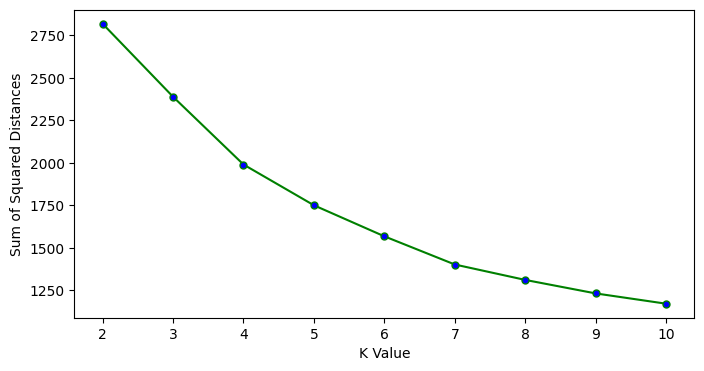

In [ ]:
#Plotting ssd vs k values.
plt.figure(figsize=(8,4),dpi=100)
plt.plot(range(2,11),ssd, marker='o',color='green', markerfacecolor='blue', markersize=5);
plt.xlabel("K Value")
plt.ylabel("Sum of Squared Distances")


In [ ]:
#The generated label or categories for the customers. Note that the labels 0 to 5 can change if we re-run the code
#i.e., all the customers currently assigned cluster 4 can become 2 or 5 if we re-run the code.
#but the customers who are allocated a particular category will remain the same.

k_means_labels = model.fit_predict(df)
k_means_labels

array([3, 2, 1, ..., 1, 0, 1], dtype=int32)

In [ ]:
df.head()

,Age,Annual Income (USD),Monthly Purchase Frequency,Annual Spending (USD)
0,56,25903,9,15
1,69,53051,14,31
2,46,38654,9,28
3,32,28666,12,22
4,60,40301,11,45


**Data Visualization**

In [ ]:
#Let's plot a 3-D scatterplot along with the customers separated by Monthly Purchase Frequency based on different shapes.

import plotly.express as px
# Add the cluster labels to the original DataFrame
df['Cluster'] = kmeans.labels_

# Visualize the clusters in 3D using Age, Annual Income, and Annual Spending with Plotly Express
fig = px.scatter_3d(df, x='Age', y='Annual Income (USD)', z='Annual Spending (USD)',
                    color='Cluster',  # Color points by cluster
                    title='Customer Clusters in 3D',
                    labels={'Age': 'Age', 'Annual Income (USD)': 'Annual Income (USD)', 'Annual Spending (USD)': 'Annual Spending (USD)'}
                   )

fig.update_layout(margin=dict(l=0, r=0, b=0, t=40))
fig.show()

**Analyze Cluster Characteristics**

In [ ]:
# Analyze the characteristics of each cluster
cluster_characteristics = df.groupby('Cluster')[['Age', 'Annual Income (USD)', 'Monthly Purchase Frequency', 'Annual Spending (USD)']].mean()
display(cluster_characteristics)

,Age,Annual Income (USD),Monthly Purchase Frequency,Annual Spending (USD)
Cluster,,,,
0,45.920168,65748.491597,12.369748,72.836134
1,57.882979,49491.382979,8.251773,31.000000
2,39.844444,39078.004444,12.524444,38.306667
3,29.811765,48885.721569,7.376471,27.250980


# **Summary:**

**Data Analysis Key Findings**

Based on the K-Means clustering with 4 clusters, the following key characteristics were observed for each segment:

*   **Cluster 0:** Characterized by the highest average annual income (`65748.49 USD`) and annual spending (`72.84 USD`), and a high monthly purchase frequency (`12.37`). This group represents high-value, frequent customers.
*   **Cluster 1:** This cluster has the highest average age (`57.88 years`), moderate annual income (`49491.38 USD`) and annual spending (`31.00 USD`), and the second lowest monthly purchase frequency (`8.25`). This group could be older, moderate spenders.
*   **Cluster 2:** Customers in this cluster have the lowest average annual income (`39078.00 USD`), a moderate average age (`39.84 years`), the highest monthly purchase frequency (`12.52`), and moderate annual spending (`38.31 USD`). This group appears to be younger, frequent, lower-income shoppers.
*   **Cluster 3:** This group has the lowest average age (`29.81 years`), moderate annual income (`48885.72 USD`), the lowest monthly purchase frequency (`7.38`), and the lowest annual spending (`27.25 USD`). This group could be young, low-spending, infrequent shoppers.

**Insights or Next Steps**


*   Identified Distinct Customer Segments:
Through K-Means clustering, we've identified four distinct customer groups based on their age, income, purchase frequency, and spending habits. Each cluster exhibits unique characteristics, allowing for targeted strategies.
*   Enable Targeted Marketing and Strategy: The identified clusters provide a foundation for developing tailored marketing campaigns, product offerings, and customer engagement strategies for each segment. Further analysis within each cluster can refine these strategies for maximum impact.